# Building Neural Networks with Keras

In this lab you will explore how to use the Keras library to build neural networks.

[Keras](https://keras.io/) is a user-friendly neural network library.  It builds on top of lower-level libraries such as Tensorflow, PyTorch, and JAX to make the process of designing and training neural networks easier.

Here we create a simple multi-layer perceptron (MLP) on a toy dataset to demonstrate the basic features of Keras.

Note that we have selected the GPU runtime in `Runtime > Change runtime type` to speed up neural network training.

In [5]:
import keras
from keras import Sequential
from keras.optimizers import SGD
from keras.layers import Input, Dense
import glob
import imageio
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

To create the moons dataset I use the scikit-learn `make_moons` function.  I included noise to make the problem a little more interesting.

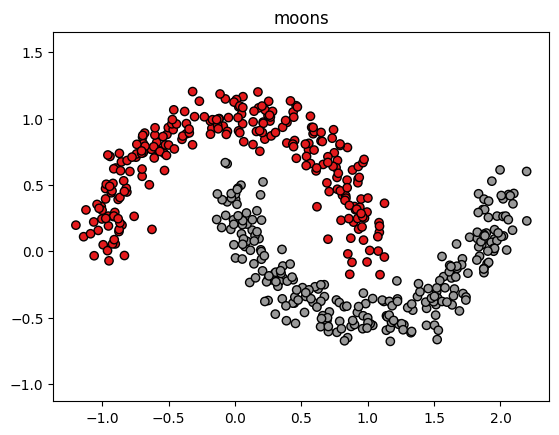

In [2]:
from sklearn.datasets import make_moons
import numpy as np
from matplotlib import pyplot as plt

x,y = make_moons(n_samples=500,noise=0.1)
x = x.astype('float32')

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.axis('equal')
plt.title('moons')
plt.show()

## Neural network setup

To create a feed-forward neural network using Keras, we can use the Sequential class which accepts a list of layers as its argument.

The `Input` layer specifies the shape of the input, not including the batch dimension (the first dimension).

A `Dense` layer implements the linear transformation optionally combined with a non-linear activation:

$$x' = \sigma(Wx+b)$$

The first argument is the number of hidden units, i.e., the width.  ReLU is the standard choice for activation but there are many others to choose from.

Since this is a binary classification problem, we only need to output a single probability value (the probability of the point belonging to the positive class).  We use the sigmoid activation to produce a probability value between 0 and 1.

In [3]:
model = Sequential([
    Input(x.shape[1:]),
    Dense(10,activation='relu',name='h1'),
    Dense(10,activation='relu',name='h2'),
    Dense(1,activation='sigmoid',name='z')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ h1 (Dense)                      │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ h2 (Dense)                      │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ z (Dense)                       │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

Now we specify some hyperparameters: the learning rate, batch size, and number of epochs.

In [4]:
epochs = 500
learning_rate = 0.1
batch_size= 128

Before we can train the model we need to select an optimizer and compile the model with a loss function.

As a starting point we use the `SGD` optimizer which implements stochastic gradient descent with momentum.  `Adam` is the modern optimizer of choice, but there are many other optimizers to choose from as well.

We need to use the `binary_crossentropy` loss since we have a binary classification problem.

We can also tell Keras to compute other metrics to monitor during training such as accuracy.  These are not included in the loss function but only shown to help gauge model performance during training.

In [5]:
opt = SGD(learning_rate=learning_rate)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

To fit the model we call `model.fit` and pass in the data and training settings.

In [6]:
history = model.fit(x,y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=True)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6405 - loss: 0.7095  
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6862 - loss: 0.6394
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6524 - loss: 0.6124
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6567 - loss: 0.5882
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6743 - loss: 0.5652
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6857 - loss: 0.5393
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7323 - loss: 0.5091
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7413 - loss: 0.4900
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7421 - loss: 0.4907
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7800 - loss: 0.4582
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7845 - loss: 0.4438
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8010 - loss: 0.4213

Once training is done we can plot the accuracy over time.

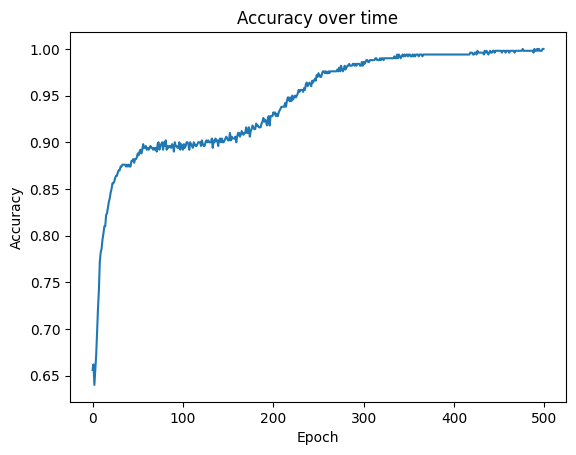

In [7]:
plt.plot(history.history['accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over time')
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 202us/step


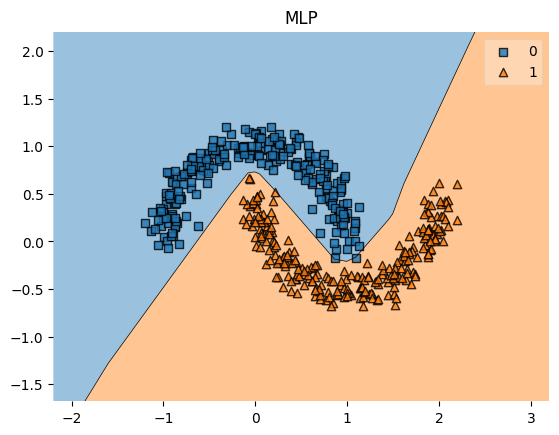

In [9]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x, y, clf=model)
plt.title("MLP")
plt.show()

## Exercises

We will use the [Intel Image Classification dataset](https://www.kaggle.com/datasets/puneet6060/intel-image-classification).  Download it from Kaggle or from [OneDrive](https://cpslo-my.sharepoint.com/:u:/g/personal/jventu09_calpoly_edu/EW40XA_u31RNil1YzmBX-GUBSsqjb508K-iBA2ka5Uri_A?e=webnMY).

Here is code to extract image descriptors using a pre-trained "MobileNet" network.

In [1]:
label_names = ['buildings','forest','glacier','mountain','sea','street']

In [6]:
def load_split(split):
    images = []
    labels = []
    for label in label_names:
        image_paths = sorted(glob.glob(f'archive/seg_{split}/seg_{split}/{label}/*.jpg'))
        for path in image_paths:
            image = imageio.imread(path)
            if len(image.shape)<3:
                continue
            if image.shape[0]!=150 or image.shape[1]!=150 or image.shape[2]!=3:
                continue
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

train_images, train_labels = load_split('train')
test_images, test_labels = load_split('test')

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_48559/1112897.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path)


In [7]:
mobilenet = keras.applications.MobileNetV2(include_top=False,pooling='avg')

/var/folders/q8/mqm68gfx7pjfpqftf7y_v6140000gn/T/ipykernel_48559/568530069.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet = keras.applications.MobileNetV2(include_top=False,pooling='avg')


In [8]:
train_descriptors = mobilenet.predict(
    keras.applications.mobilenet_v2.preprocess_input(train_images),
    verbose=True)
test_descriptors = mobilenet.predict(
    keras.applications.mobilenet_v2.preprocess_input(test_images),
    verbose=True)

438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 88ms/step
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step


Now create an MLP to classify the image descriptors.

Here are some tips and tricks to try to maximize performance:
* Try Adam optimizer instead of SGD
* Try a low learning rate like 3e-4
* Include a validation split to monitor overfitting
* Use `ModelCheckpoint` with `save_weights_only=True` and `save_best_only=True` to save the model weights with the best validation accuracy seen during training.  You will then need to do `model.load_weights` after training to reload the best weights.
* Try various forms of regularization (e.g., the `kernel_regularizer` argument to `Dense`)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# turn string labels into integer indices
le = LabelEncoder()
train_y_int = le.fit_transform(train_labels)
test_y_int  = le.transform(test_labels)
num_classes = len(le.classes_)

# one-hot encode
train_y = to_categorical(train_y_int, num_classes)
test_y  = to_categorical(test_y_int, num_classes)

print(f"{num_classes} classes:", le.classes_)

6 classes: ['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [ ]:
from keras import Sequential
from keras.layers import Dense, Dropout, Input
from keras import regularizers
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split

model = Sequential([
    Input(shape=(train_descriptors.shape[1],), name='descriptor_input'),
    Dense(256, activation='relu',
          kernel_regularizer=regularizers.l2(1e-5),
          name='dense_1'),
    BatchNormalization(),
    Dropout(0.2, name='dropout_1'),
    Dense(128, activation='relu',
          kernel_regularizer=regularizers.l2(1e-5),
          name='dense_2'),
    BatchNormalization(),
    Dropout(0.2, name='dropout_2'),
    Dense(num_classes, activation='softmax', name='output')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,142 (1.39 MB)

 Trainable params: 362,374 (1.38 MB)

 Non-trainable params: 768 (3.00 KB)

In [ ]:
learning_rate = 3e-4
opt = Adam(learning_rate=learning_rate)

model.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
checkpoint_cb = ModelCheckpoint(
    filepath='best_mlp_weights.weights.h5',
    save_weights_only=True,
    save_best_only=True,
    monitor='val_accuracy',
    verbose=1
)

In [ ]:
epochs = 100
batch_size = 64

x_train, x_val, y_train, y_val = train_test_split(
    train_descriptors,
    train_y,
    test_size=0.2,
    stratify=train_y_int,
    random_state=42
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[checkpoint_cb],
    verbose=2
)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.89635, saving model to best_mlp_weights.weights.h5
175/175 - 2s - 9ms/step - accuracy: 0.8222 - loss: 0.5093 - val_accuracy: 0.8964 - val_loss: 0.2942
Epoch 2/100

Epoch 2: val_accuracy improved from 0.89635 to 0.90600, saving model to best_mlp_weights.weights.h5
175/175 - 1s - 4ms/step - accuracy: 0.8975 - loss: 0.2843 - val_accuracy: 0.9060 - val_loss: 0.2741
Epoch 3/100

Epoch 3: val_accuracy improved from 0.90600 to 0.90779, saving model to best_mlp_weights.weights.h5
175/175 - 1s - 4ms/step - accuracy: 0.9183 - loss: 0.2347 - val_accuracy: 0.9078 - val_loss: 0.2673
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.90779
175/175 - 1s - 4ms/step - accuracy: 0.9281 - loss: 0.2033 - val_accuracy: 0.9024 - val_loss: 0.2714
Epoch 5/100

Epoch 5: val_accuracy improved from 0.90779 to 0.90922, saving model to best_mlp_weights.weights.h5
175/175 - 1s - 4ms/step - accuracy: 0.9365 - loss: 0.1746 - val_accuracy: 0.9092 - val_

In [31]:
model.load_weights('best_mlp_weights.weights.h5')
test_loss, test_acc = model.evaluate(test_descriptors, test_y, verbose=0)
print(f"Test accuracy: {test_acc:.4f}, loss: {test_loss:.4f}")

Test accuracy: 0.9151, loss: 0.2508


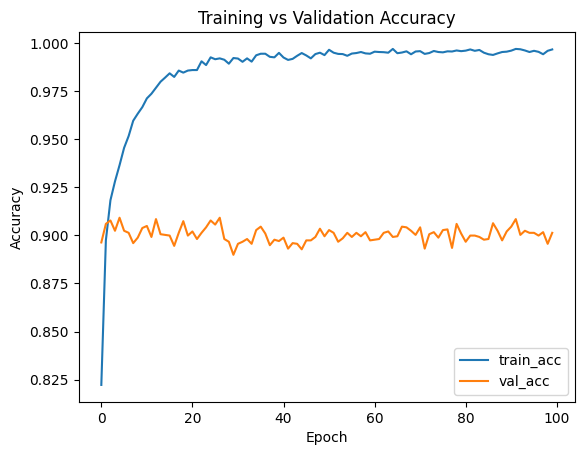

In [32]:
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()